In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import json
import csv
import os
import re

# مسیر فایل‌های JSON
json_dir = "./drive/MyDrive/AIBootcampProject1/2/"
csv_file = "mobile_data.csv"

# لیست تمام ستون‌ها
columns = [
    "name", "brand", "2G", "3G", "4G", "5G", "Announced", "Status", "Weight",
    "Length", "Width", "Diameter", "SIM", "Display Type", "Display Size", "PPI",
    "Body Ratio", "OS", "Battery_capacity", "Price", "CPU", "Ratio", "Pixel",
    "WLAN", "Colors", "Sensors", "Bluetooth", "GPU", "LoudSpeaker", "3.5mm jack",
    "Chipset", "Network", "Internal", "Card slot", "RAM", "Storage"
]

# باز کردن فایل CSV برای نوشتن
with open(csv_file, 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=columns)
    writer.writeheader()
    ww=0
    # پردازش هر فایل JSON
    for filename in os.listdir(json_dir):
        if filename.endswith(".json"):
            filepath = os.path.join(json_dir, filename)
            with open(filepath, 'r', encoding='utf-8') as f:
                data = json.load(f)
                for brand, phones in data.items():
                    for phone_name, details in phones.items():
                        row = {column: None for column in columns}
                        row["name"] = phone_name
                        row["brand"] = brand

                        # استخراج جزئیات
                        for key, value in details.items():
                            #print("-------------------------",key,value)
                            if key=="Display":
                              row["Display Type"]=value[0]["Type"].split(",")[0]
                              row["Display Size"]=value[1]["Size"].split(" ")[0]
                              pattern = r"~(\d+)\s*ppi\s*density"
                              match = re.search(pattern, value[2]["Resolution"])
                              row["PPI"] = match.group(1) if match else None
                            if key=="Network":
                              #print("💔💔💔",value[0]["Technology"])
                              row["Network"]=value[0]["Technology"]
                            if key =="Battery":
                              pattern = r"(\d+)\s*mAh"
                              match = re.search(pattern, value[0]["Type"])
                              row["Battery_capacity"]=match.group(1) if match else None
                            # if key=="Memory":
                            #     print("💔💔💔",value)
                            #     if len(value)>2:
                            #       row["Storage"]=value[1]["Internal"].split(" ")[0]
                            #       if len(value[1]["Internal"].split(" "))>2:
                            #         row["RAM"]=value[1]["Internal"].split(" ")[1]
                                #print("💔💔💔",value[0]["Internal"]






                            if isinstance(value, list):
                                for item in value:
                                    #print("😀",value)
                                    if isinstance(item, dict):

                                        for subkey, subvalue in item.items():
                                            # مدیریت داده‌های کلیدی خاص
                                            if subkey in columns:
                                                row[subkey] = subvalue
                                            elif "2G bands"==subkey:
                                              row["2G"]=True
                                            elif "3G bands"==subkey:
                                              row["3G"]=True
                                            elif "4G bands"==subkey:
                                              row["4G"]=True
                                            elif "5G bands"==subkey:
                                              row["5G"]=True
                                            # elif "Dimensions"==subkey :
                                            #   print(subvalue.split(" "))
                                            #   s=subvalue.split(" ")
                                            #   if s[0]!="" and s[0]!="-":
                                            #      if s[0]=="Unfolded:":
                                            #        row["Length"]=s[1]
                                            #        row["Width"]=s[3]
                                            #        row["Diameter"]=s[5]
                                            #      else:
                                            #        row["Length"]=s[0]
                                            #        if s[2]=='mm':
                                            #          row["Width"]=s[0]
                                            #        row["Diameter"]=s[4]
                                            if "Loudspeaker"==subkey:
                                              row["LoudSpeaker"]=True if subvalue=="Yes" else False
                                            if "3.5mm jack"==subkey:
                                              row["3.5mm jack"]=True if subvalue=="Yes" else False
                                            if subkey=="Price":
                                              #print(ww)
                                              ww=ww+1
                                              pattern = r"[€$£]?\s?(\d{1,3}(?:,\d{3})*(?:\.\d{1,2})?)"
                                              matches = re.findall(pattern, subvalue)
                                              # row["Length"]=subvalue.split(" x ")[0]
                                              # row["Width"]=subvalue.split(" x ")[1]
                                              # row["Diameter"]=subvalue.split(" x ")[2]
                                              row["Price"]=matches[0]
                                              conversion_rates = {
                                                    '$': 0.85,
                                                    '£': 1.15,
                                                    '₹': 0.011,
                                                    '€': 1.0
                                                }

                                              # الگوی regex برای استخراج مقادیر
                                              pattern = r"([€$£₹])\s?(\d{1,3}(?:,\d{3})*(?:\.\d{1,2})?)"

                                              matches = re.findall(pattern, subvalue)

                                              # تبدیل مقادیر به یورو
                                              converted_values = []
                                              for currency, value in matches:
                                                   # حذف کاماها و تبدیل به float
                                                   numeric_value = float(value.replace(',', ''))

                                                   # تبدیل به یورو
                                                   converted_value = numeric_value * conversion_rates[currency]
                                                   row["Price"]=round(converted_value, 2)



                            else:
                                if key in columns:
                                    row[key] = value

                        writer.writerow(row)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("./mobile_data.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5910 entries, 0 to 5909
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              5910 non-null   object 
 1   brand             5910 non-null   object 
 2   2G                5910 non-null   bool   
 3   3G                4328 non-null   object 
 4   4G                2648 non-null   object 
 5   5G                462 non-null    object 
 6   Announced         5903 non-null   object 
 7   Status            5910 non-null   object 
 8   Weight            5873 non-null   object 
 9   Length            0 non-null      float64
 10  Width             0 non-null      float64
 11  Diameter          0 non-null      float64
 12  SIM               5908 non-null   object 
 13  Display Type      5910 non-null   object 
 14  Display Size      5532 non-null   object 
 15  PPI               5507 non-null   float64
 16  Body Ratio        0 non-null      float64


In [7]:
df['2G'] = df['2G'].fillna(False)
df['3G'] = df['3G'].fillna(False)
df['4G'] = df['4G'].fillna(False)
df['5G'] = df['5G'].fillna(False)

<ipython-input-7-3015b5d8e379>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['3G'] = df['3G'].fillna(False)
<ipython-input-7-3015b5d8e379>:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['4G'] = df['4G'].fillna(False)
<ipython-input-7-3015b5d8e379>:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['5G'] = df['5G'].fillna(False

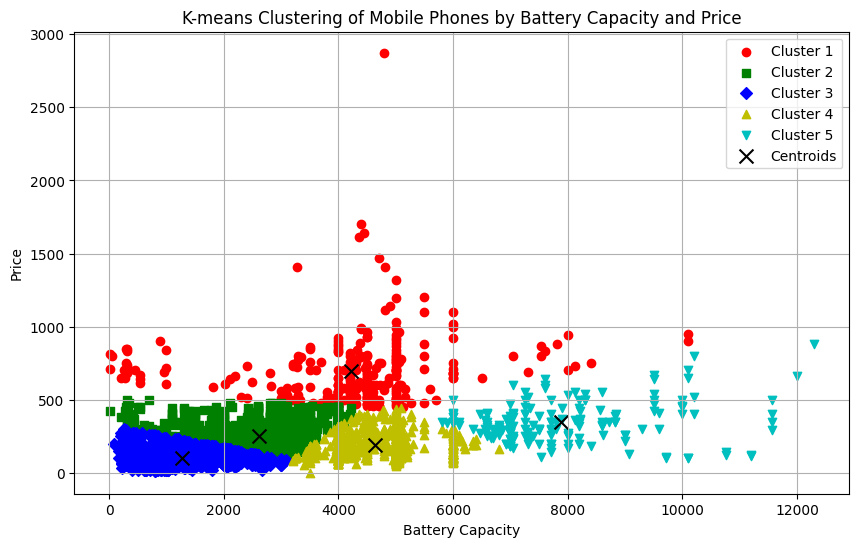

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



df_cluster = df[['Battery_capacity', 'Price']].dropna()

df_cluster['Battery_capacity'] = df_cluster['Battery_capacity'].astype(float)
#df_cluster['Price'] = df_cluster['Price'].str.replace('[^\d.]', '').astype(float)

scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df_cluster_scaled)

df_cluster['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b', 'y', 'c']
markers = ['o', 's', 'D', '^', 'v']

for i in range(5):
    cluster_data = df_cluster[df_cluster['Cluster'] == i]
    plt.scatter(cluster_data['Battery_capacity'], cluster_data['Price'],
                c=colors[i], label=f'Cluster {i+1}', marker=markers[i])

centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='k', marker='x', s=100, label='Centroids')

plt.title('K-means Clustering of Mobile Phones by Battery Capacity and Price')
plt.xlabel('Battery Capacity')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


elbow methode


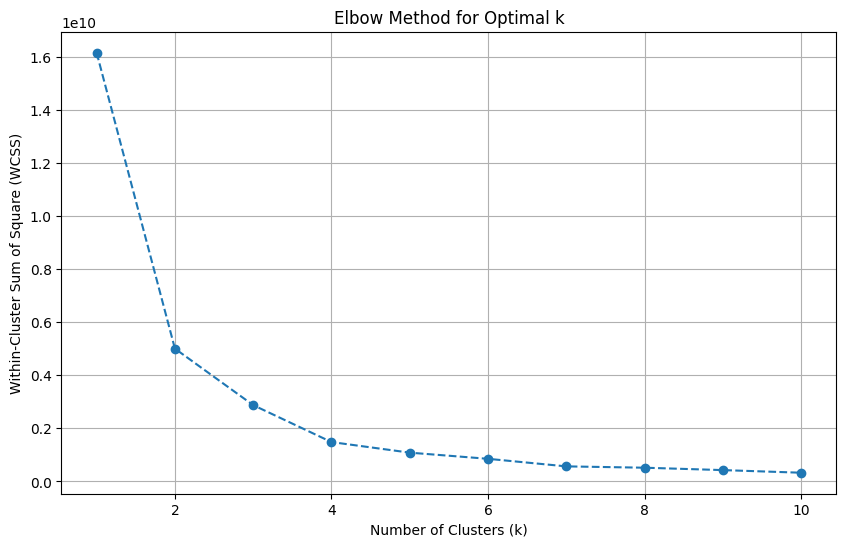

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def calculate_wcss(data, k_range):
    wcss = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    return wcss


numerical_data = df[['Battery_capacity', 'Price']].dropna() # Dropping NaNs and converting to float

k_range = range(1, 11)

wcss = calculate_wcss(numerical_data, k_range)

plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Square (WCSS)')
plt.grid(True)
plt.show()


نقطه‌ای که بعد از آن کاهش
WCSS
کم‌تر محسوس است، به عنوان "آرنج" نمودار شناخته شده و مقدار مناسب
𝑘
k محسوب می‌شود.

k=2✅

In [ ]:
#another technique with some numarical score
#silwood score

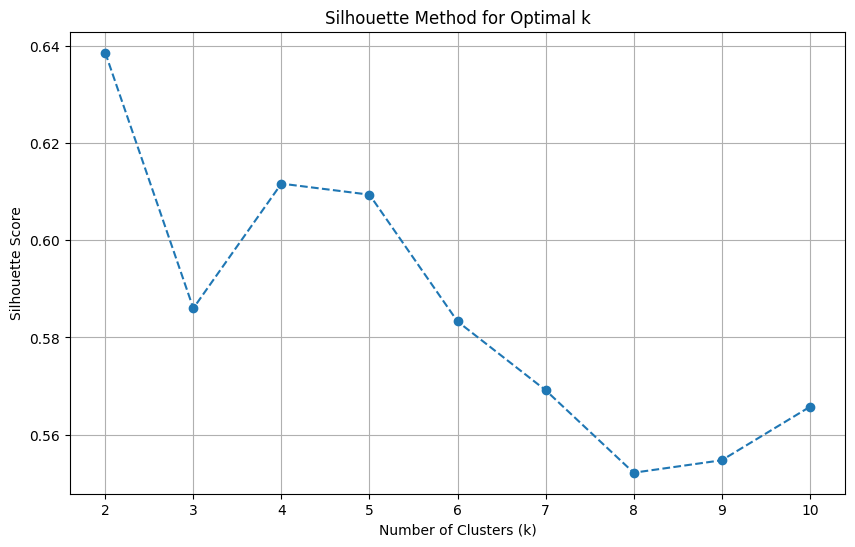

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def calculate_silhouette_scores(data, k_range):
    silhouette_scores = []
    for k in k_range:
        if k > 1:  # Silhouette score is undefined for k = 1
            kmeans = KMeans(n_clusters=k, random_state=42)
            kmeans.fit(data)
            score = silhouette_score(data, kmeans.labels_)
            silhouette_scores.append(score)
        else:
            silhouette_scores.append(None)  # Placeholder for k = 1
    return silhouette_scores

numerical_data = df[['Battery_capacity', 'Price']].dropna() # Dropping NaNs and converting to float

k_range = range(2, 11)  # Silhouette score starts from k = 2

silhouette_scores = calculate_silhouette_scores(numerical_data, k_range)

plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

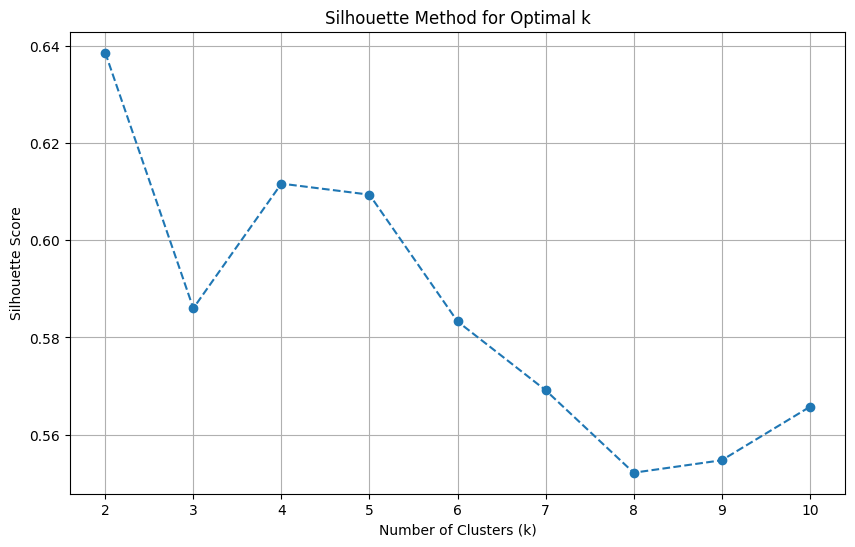

The optimal number of clusters is: 2


In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def calculate_silhouette_scores(data, k_range):
    silhouette_scores = []
    for k in k_range:
        if k > 1:  # Silhouette score is undefined for k = 1
            kmeans = KMeans(n_clusters=k, random_state=42)
            kmeans.fit(data)
            score = silhouette_score(data, kmeans.labels_)
            silhouette_scores.append(score)
        else:
            silhouette_scores.append(None)  # Placeholder for k = 1
    return silhouette_scores

# فرض می‌کنیم داده‌های شما در متغیر df قرار دارند و ستون‌های Battery_capacity و Price در آن وجود دارند
numerical_data = df[['Battery_capacity', 'Price']].dropna()  # Dropping NaNs and converting to float

k_range = range(2, 11)  # شروع از k = 2 چون silhouette score برای k = 1 محاسبه نمی‌شود

# محاسبه‌ی silhouette scores برای هر k
silhouette_scores = calculate_silhouette_scores(numerical_data, k_range)

# نمایش گراف برای silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# بهترین k را انتخاب کنیم
best_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"The optimal number of clusters is: {best_k}")

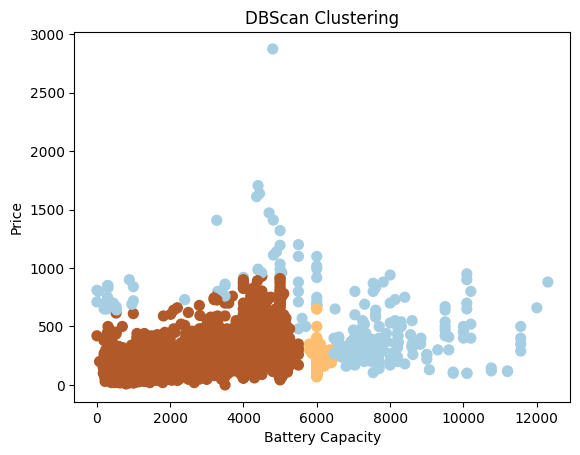

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import pandas as pd


numerical_data = df[['Battery_capacity', 'Price']].dropna().values

db = DBSCAN(eps=250, min_samples=50).fit(numerical_data)
labels = db.labels_

plt.scatter(numerical_data[:, 0], numerical_data[:, 1], c=labels, cmap='Paired', s=50)
plt.title("DBScan Clustering")
plt.xlabel("Battery Capacity")
plt.ylabel("Price")
plt.show()


In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
import numpy as np

# Custom scoring function that returns the silhouette score for DBSCAN
def silhouette_scorer(estimator, X):
    # Only compute the silhouette score if there are more than 1 cluster
    if len(set(estimator.labels_)) > 1:
        return silhouette_score(X, estimator.labels_)
    else:
        return -1  # Return a low score if there's only one cluster

# Define the parameter grid for Grid Search
param_grid = {
    'eps': np.arange(50, 300, 50),  # Try eps values from 50 to 250 with a step of 50
    'min_samples': [5, 10, 20, 50]  # Try different values for min_samples
}

# Define the DBSCAN model
dbscan = DBSCAN()

# Create the GridSearchCV object with DBSCAN and the custom scorer
grid_search = GridSearchCV(estimator=dbscan, param_grid=param_grid, scoring=silhouette_scorer, cv=3)

# Apply grid search to the data
grid_search.fit(numerical_data)

# Best parameters and best score from grid search
print("Best parameters found by Grid Search:", grid_search.best_params_)
print("Best Silhouette Score:", grid_search.best_score_)

# Get the best DBSCAN model from grid search
best_dbscan = grid_search.best_estimator_

# Apply DBSCAN with the best parameters to the data
labels = best_dbscan.labels_

# Plot the results
plt.scatter(numerical_data[:, 0], numerical_data[:, 1], c=labels, cmap='Paired', s=50)
plt.title("DBSCAN Clustering with Best Parameters from Grid Search")
plt.xlabel("Battery Capacity")
plt.ylabel("Price")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 947, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-13-f8cfaa7a3199>", line 10, in silhouette_scorer
    return silhouette_score(X, estimator.labels_)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_param_validation.py", line 216, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/cluster/_unsupervised.py", line 139, in silhouette_score
    return np.mean(silhouette_samples(X, labels, metric=metric, **kwds))
     

Best parameters found by Grid Search: {'eps': 50, 'min_samples': 5}
Best Silhouette Score: nan


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 947, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-13-f8cfaa7a3199>", line 10, in silhouette_scorer
    return silhouette_score(X, estimator.labels_)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_param_validation.py", line 216, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/cluster/_unsupervised.py", line 139, in silhouette_score
    return np.mean(silhouette_samples(X, labels, metric=metric, **kwds))
     

InvalidIndexError: (slice(None, None, None), 0)